In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, r2_score

import kagglehub

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)



In [2]:
# Download latest dataset version
path = kagglehub.dataset_download("gokulrajkmv/unemployment-in-india")
print("Dataset downloaded to:", path)


100%|██████████| 16.0k/16.0k [00:00<00:00, 22.9MB/s]

Extracting files...
Dataset downloaded to: /root/.cache/kagglehub/datasets/gokulrajkmv/unemployment-in-india/versions/5


In [4]:
import os

file_path = os.path.join(path, "Unemployment in India.csv")

df = pd.read_csv(file_path)
df.head()


,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [5]:
df.columns = [
    "Region",
    "Date",
    "Frequency",
    "Estimated_Unemployment_Rate",
    "Estimated_Employed",
    "Estimated_Labour_Participation_Rate",
    "Area"
]

df.head()


,Region,Date,Frequency,Estimated_Unemployment_Rate,Estimated_Employed,Estimated_Labour_Participation_Rate,Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [6]:
df["Date"] = pd.to_datetime(df["Date"], dayfirst=True, errors="coerce")

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Region                               740 non-null    object        
 1   Date                                 740 non-null    datetime64[ns]
 2   Frequency                            740 non-null    object        
 3   Estimated_Unemployment_Rate          740 non-null    float64       
 4   Estimated_Employed                   740 non-null    float64       
 5   Estimated_Labour_Participation_Rate  740 non-null    float64       
 6   Area                                 740 non-null    object        
dtypes: datetime64[ns](1), float64(3), object(3)
memory usage: 42.1+ KB


In [7]:
df.isnull().sum()

# Drop rows with missing numeric values
df = df.dropna(subset=[
    "Estimated_Unemployment_Rate",
    "Estimated_Employed",
    "Estimated_Labour_Participation_Rate"
]).reset_index(drop=True)


In [8]:
df.describe()


,Date,Estimated_Unemployment_Rate,Estimated_Employed,Estimated_Labour_Participation_Rate
count,740,740.000000,7.400000e+02,740.000000
mean,2019-12-12 18:36:58.378378496,11.787946,7.204460e+06,42.630122
min,2019-05-31 00:00:00,0.000000,4.942000e+04,13.330000
25%,2019-08-31 00:00:00,4.657500,1.190404e+06,38.062500
50%,2019-11-30 00:00:00,8.350000,4.744178e+06,41.160000
75%,2020-03-31 00:00:00,15.887500,1.127549e+07,45.505000
max,2020-06-30 00:00:00,76.740000,4.577751e+07,72.570000
std,NaN,10.721298,8.087988e+06,8.111094


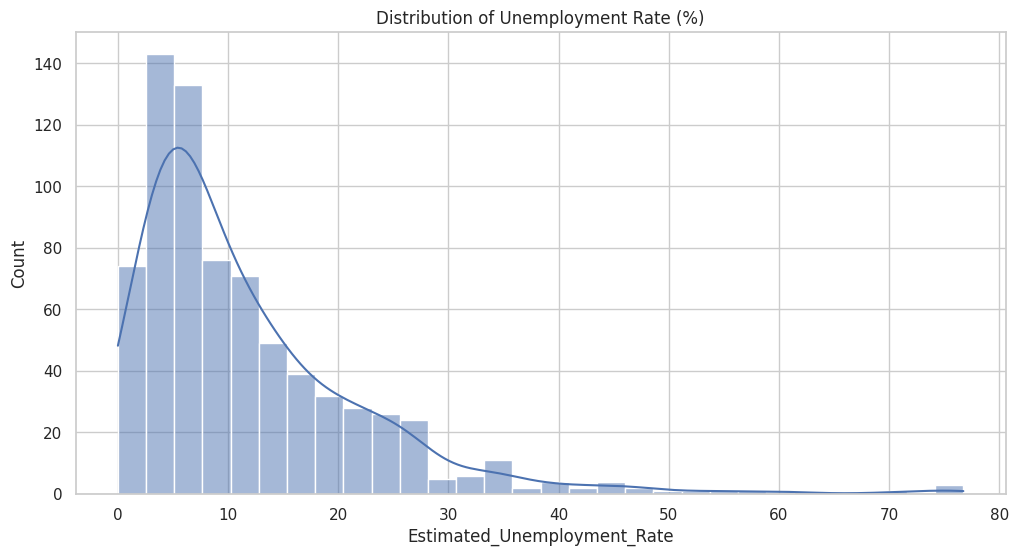

In [9]:
plt.figure()
sns.histplot(df["Estimated_Unemployment_Rate"], kde=True, bins=30)
plt.title("Distribution of Unemployment Rate (%)")
plt.show()


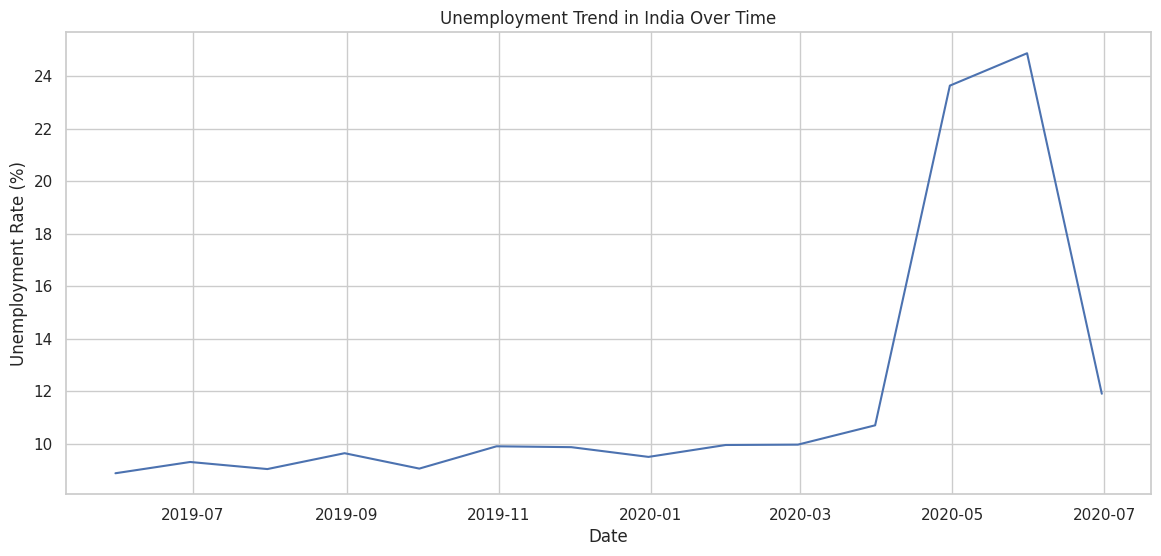

In [10]:
daily_rate = df.groupby("Date")["Estimated_Unemployment_Rate"].mean().reset_index()

plt.figure(figsize=(14,6))
sns.lineplot(data=daily_rate, x="Date", y="Estimated_Unemployment_Rate")
plt.title("Unemployment Trend in India Over Time")
plt.ylabel("Unemployment Rate (%)")
plt.show()


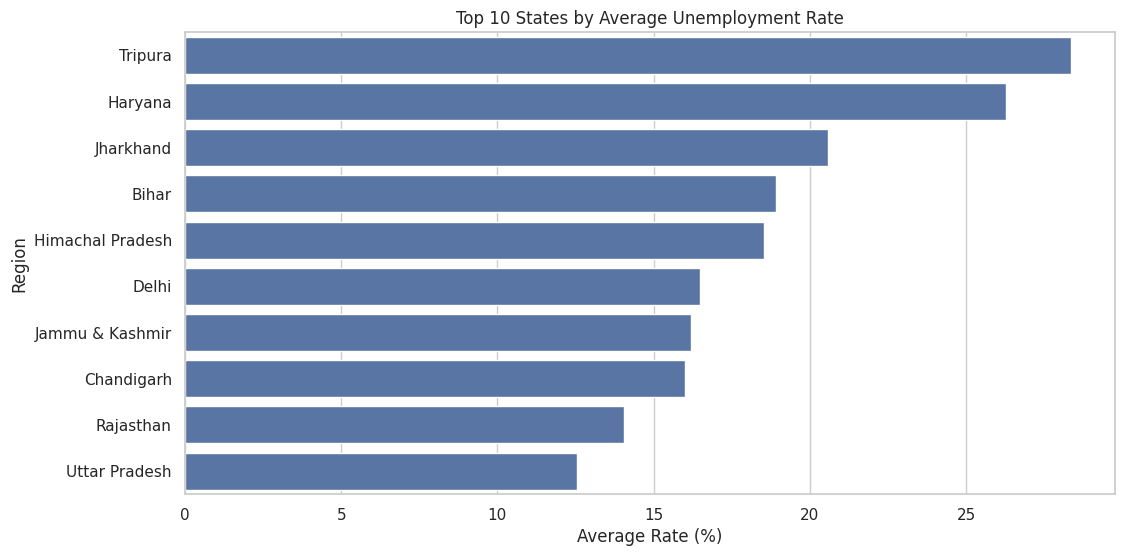

In [11]:
top_states = df.groupby("Region")["Estimated_Unemployment_Rate"].mean().sort_values(ascending=False).head(10)

plt.figure()
sns.barplot(x=top_states.values, y=top_states.index)
plt.title("Top 10 States by Average Unemployment Rate")
plt.xlabel("Average Rate (%)")
plt.show()


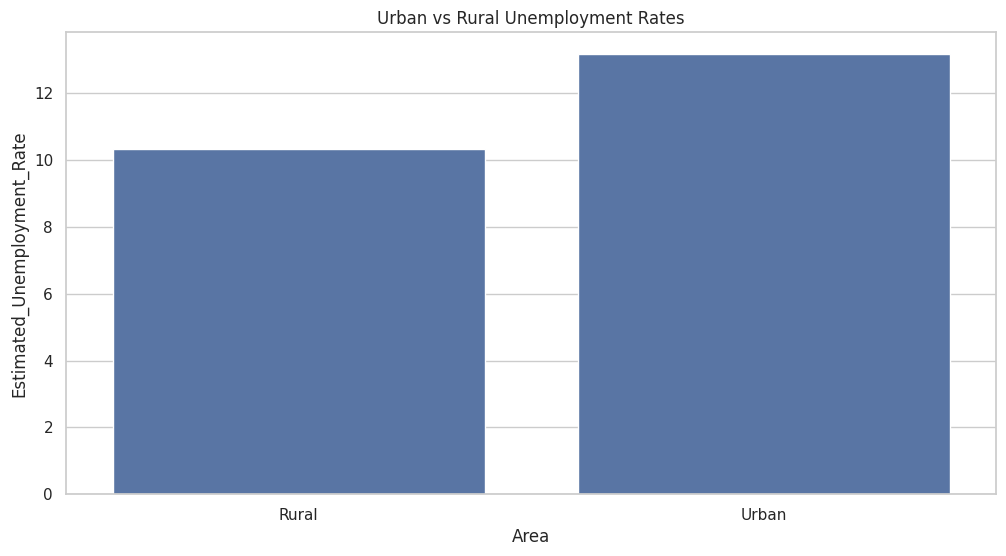

In [12]:
area = df.groupby("Area")["Estimated_Unemployment_Rate"].mean().reset_index()

sns.barplot(data=area, x="Area", y="Estimated_Unemployment_Rate")
plt.title("Urban vs Rural Unemployment Rates")
plt.show()


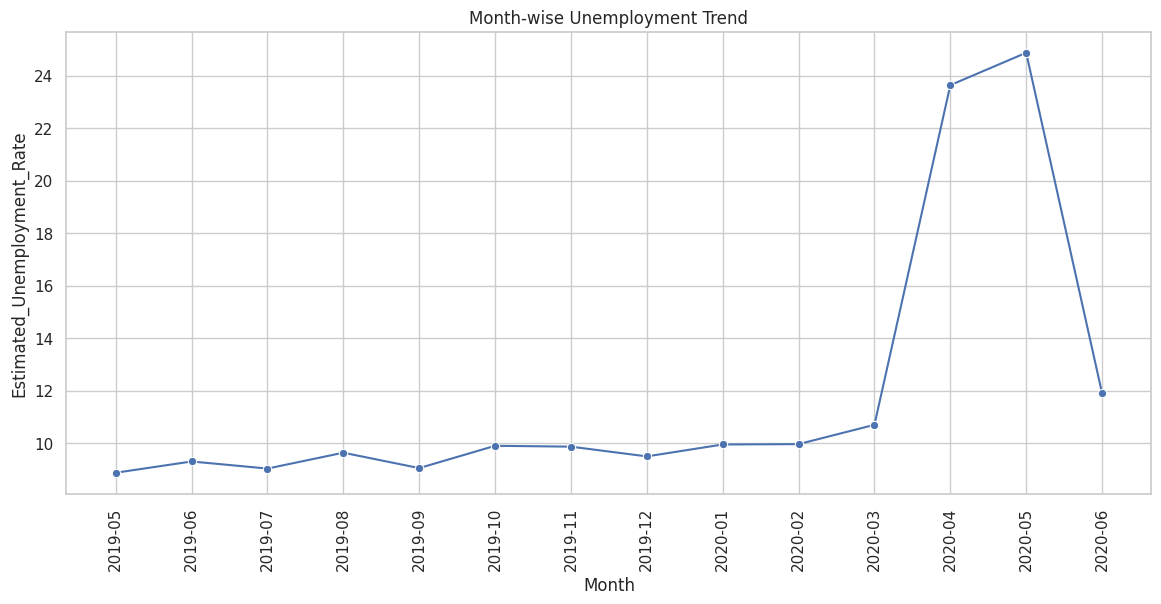

In [13]:
df["Month"] = df["Date"].dt.to_period("M").astype(str)

monthly = df.groupby("Month")["Estimated_Unemployment_Rate"].mean().reset_index()

plt.figure(figsize=(14,6))
sns.lineplot(data=monthly, x="Month", y="Estimated_Unemployment_Rate", marker="o")
plt.xticks(rotation=90)
plt.title("Month-wise Unemployment Trend")
plt.show()


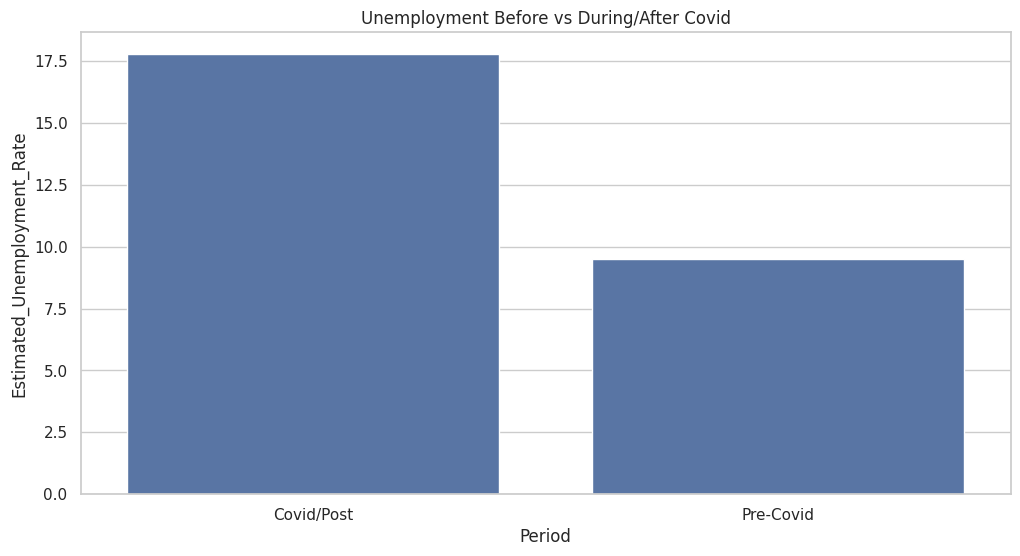

In [14]:
df["Period"] = np.where(df["Date"] < "2020-03-01", "Pre-Covid", "Covid/Post")

period = df.groupby("Period")["Estimated_Unemployment_Rate"].mean().reset_index()

sns.barplot(data=period, x="Period", y="Estimated_Unemployment_Rate")
plt.title("Unemployment Before vs During/After Covid")
plt.show()


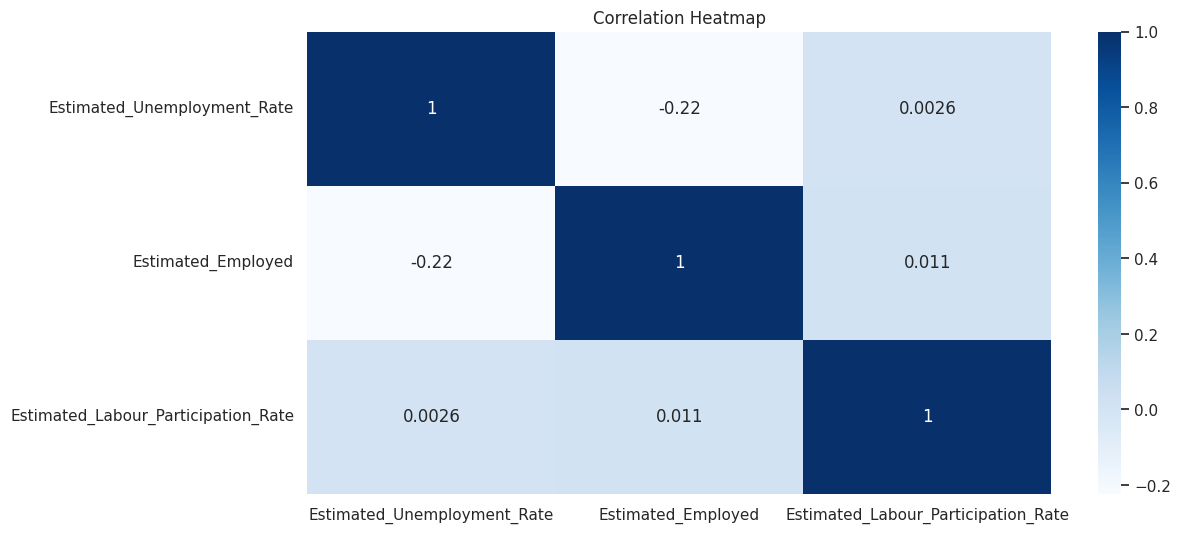

In [15]:
num_cols = [
    "Estimated_Unemployment_Rate",
    "Estimated_Employed",
    "Estimated_Labour_Participation_Rate"
]

plt.figure()
sns.heatmap(df[num_cols].corr(), annot=True, cmap="Blues")
plt.title("Correlation Heatmap")
plt.show()


In [16]:
model_df = df.copy()

# Encode categorical columns
le = LabelEncoder()
model_df["Area_enc"] = le.fit_transform(model_df["Area"])
model_df["Freq_enc"] = le.fit_transform(model_df["Frequency"])

# Features and Target
X = model_df[["Estimated_Employed", "Estimated_Labour_Participation_Rate", "Area_enc", "Freq_enc"]]
y = model_df["Estimated_Unemployment_Rate"]

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mae, r2


(8.31547468840568, 0.04669454883866697)

In [17]:
pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_
})


,Feature,Coefficient
0,Estimated_Employed,-2.773152e-07
1,Estimated_Labour_Participation_Rate,5.185675e-02
2,Area_enc,3.013760e-01
3,Freq_enc,3.013760e-01


✔ Findings

Unemployment peaked sharply during the Covid lockdown.
Some states consistently show higher unemployment.
Urban and Rural unemployment differ significantly.
Labour Participation Rate strongly influences unemployment.
The simple regression model gives a reasonable R² value.
This completes Task 2 – Unemployment Analysis (Oasis Infobyte Internship).